## Data Preprocessing

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Starbucks_Stock_Price_Train.csv')

In [3]:
dataset_train

,Date,Close/Last,Volume,Open,High,Low
0,01/13/2014,$37.56,14644198,$38.69,$38.70,$37.38
1,01/14/2014,$37.73,18645578,$37.56,$38.18,$37.38
2,01/15/2014,$38.10,8657684,$37.77,$38.17,$37.71
3,01/16/2014,$37.65,9029284,$37.91,$38.10,$37.57
4,01/17/2014,$37.45,12937332,$37.50,$37.73,$37.34
...,...,...,...,...,...,...
2490,12/04/2023,$97.60,11477380,$98.39,$98.88,$96.77
2491,12/05/2023,$95.54,16027350,$97.38,$97.48,$94.85
2492,12/06/2023,$97.02,12115000,$95.95,$97.17,$95.47
2493,12/07/2023,$96.44,7858295,$97.25,$97.70,$96.27


In [4]:
dataset_train['Open'] = dataset_train['Open'].apply(lambda x: float(x.replace('$', '')))

In [5]:
dataset_train

,Date,Close/Last,Volume,Open,High,Low
0,01/13/2014,$37.56,14644198,38.69,$38.70,$37.38
1,01/14/2014,$37.73,18645578,37.56,$38.18,$37.38
2,01/15/2014,$38.10,8657684,37.77,$38.17,$37.71
3,01/16/2014,$37.65,9029284,37.91,$38.10,$37.57
4,01/17/2014,$37.45,12937332,37.50,$37.73,$37.34
...,...,...,...,...,...,...
2490,12/04/2023,$97.60,11477380,98.39,$98.88,$96.77
2491,12/05/2023,$95.54,16027350,97.38,$97.48,$94.85
2492,12/06/2023,$97.02,12115000,95.95,$97.17,$95.47
2493,12/07/2023,$96.44,7858295,97.25,$97.70,$96.27


In [6]:
training_set= dataset_train.iloc[:,3:4].values

In [7]:
len(training_set)

2495

### Feature scaling

Whenever building RNN and especially if theres a sigmoid function as the activation function in the output layer of your RNN, it is recommended to apply 'Normalisation'

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [9]:
training_set_scaled

array([[0.04261613],
       [0.03023663],
       [0.03253725],
       ...,
       [0.66991674],
       [0.68415863],
       [0.67134093]])

### Creating a data structure with 60 timesteps and 1 output

In [10]:
len(training_set_scaled)

2495

In [11]:
X_train=[]
y_train=[]
for i in range(60,2495):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

### Reshaping/adding new dimension to the prev data structure we made

this dimension we are gonna add is exactly the unit i.e. the number of predictors we can use to predict what we want

In [12]:
X_train.shape

(2435, 60)

In [13]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

any time you want to add a new dimension in numpy array, you always need to use the reshape function

## Building the RNN

stacked LSTM with some dropout regularization to prevent overfitting

### Importing keras libraries and packages

In [14]:
from keras.models import Sequential #nn object representing sequence of layers
from keras.layers import Dense #to add the output layer
from keras.layers import LSTM #adds LSTM layers
from keras.layers import Dropout #adds some dropout regularization

### Initializing the RNN

In [15]:
regressor=Sequential()

### Adding the first LSTM layer and some dropout regulations

units=no of neurons in each of the multiple LSTM layer------
return_sequences=True cz we gonna add another LSTM layer--------
input_shape=> reshape's last two parameters----------
dropout 20% means 10 neurons will be dropped

In [16]:
regressor.add(LSTM(units=60,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

### Other layers

no neeed of input shape for other layers

In [17]:
regressor.add(LSTM(units=60,return_sequences=True))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units=60,return_sequences=True))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units=60,return_sequences=False))#can just remove cz default is false
regressor.add(Dropout(0.2))
#last layer so no returning sequence

### Adding the output layer

In [20]:
regressor.add(Dense(units=1))

### Compiling the RNN (with right optimizer and right loss function) 

In [21]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
#RMSprop is a good option for RNN as optimizer,adam always a safe choice

### Fitting the RNN to the training set

In [22]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
77/77 [==============================] - 26s 140ms/step - loss: 0.0184
Epoch 2/100
77/77 [==============================] - 11s 140ms/step - loss: 0.0039
Epoch 3/100
77/77 [==============================] - 11s 137ms/step - loss: 0.0035
Epoch 4/100
77/77 [==============================] - 11s 143ms/step - loss: 0.0037
Epoch 5/100
77/77 [==============================] - 11s 143ms/step - loss: 0.0032
Epoch 6/100
77/77 [==============================] - 12s 150ms/step - loss: 0.0036
Epoch 7/100
77/77 [==============================] - 12s 154ms/step - loss: 0.0029
Epoch 8/100
77/77 [==============================] - 12s 155ms/step - loss: 0.0027
Epoch 9/100
77/77 [==============================] - 11s 145ms/step - loss: 0.0027
Epoch 10/100
77/77 [==============================] - 11s 141ms/step - loss: 0.0027
Epoch 11/100
77/77 [==============================] - 12s 156ms/step - loss: 0.0023
Epoch 12/100
77/77 [==============================] - 12s 154ms/step - loss: 0.0023
E

77/77 [==============================] - 11s 144ms/step - loss: 8.1643e-04
Epoch 97/100
77/77 [==============================] - 11s 145ms/step - loss: 7.6173e-04
Epoch 98/100
77/77 [==============================] - 12s 154ms/step - loss: 7.2484e-04
Epoch 99/100
77/77 [==============================] - 12s 151ms/step - loss: 7.6539e-04
Epoch 100/100
77/77 [==============================] - 11s 148ms/step - loss: 7.7111e-04


## Making the predictions and visualizing the results

### get the real Starbucks stock price 

In [23]:
dataset_test = pd.read_csv('Starbucks_Stock_Price_Test.csv')
dataset_test

,Date,Close/Last,Volume,Open,High,Low
0,12/11/2023,$98.12,7639105,$97.22,$99.01,$97.22
1,12/12/2023,$98.15,6313820,$98.44,$98.60,$97.43
2,12/13/2023,$98.11,7741909,$98.50,$98.64,$96.82
3,12/14/2023,$97.84,9764843,$98.72,$98.79,$97.15
4,12/15/2023,$96.75,12466040,$97.84,$98.24,$96.56
5,12/18/2023,$96.56,6146426,$97.24,$97.32,$95.92
6,12/19/2023,$97.72,5992883,$96.94,$98.05,$96.94
7,12/20/2023,$94.71,10057370,$96.36,$96.88,$94.65
8,12/21/2023,$95.33,7097160,$95.08,$95.44,$94.47
9,12/22/2023,$95.28,6361013,$94.89,$95.83,$94.34


In [24]:
dataset_test['Open'] = dataset_test['Open'].apply(lambda x: float(x.replace('$', '')))

In [25]:
real_stock_price= dataset_test.iloc[:,3:4].values

### getting the predicted Starbucks stock price 

In [26]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 4s 4s/step


### Visualising the results

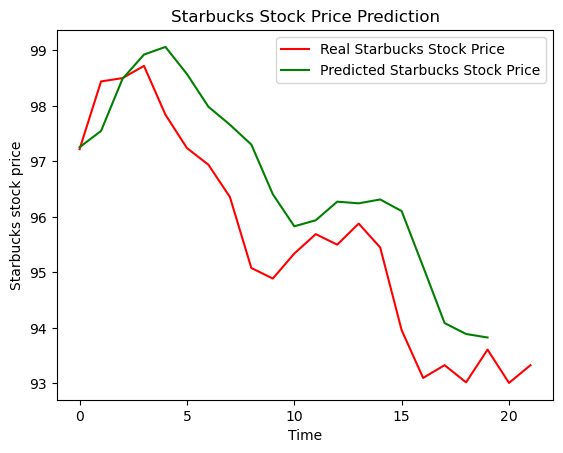

In [27]:
plt.plot(real_stock_price,color='red',label='Real Starbucks Stock Price')
plt.plot(predicted_stock_price,color='green',label='Predicted Starbucks Stock Price')
plt.title("Starbucks Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Starbucks stock price")
plt.legend()